## 기존 모델

In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

# 랜덤시드 고정시키기
np.random.seed(3)

Using TensorFlow backend.


In [17]:
# 1. 데이터셋 생성하기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [18]:
train_datagen

In [19]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [20]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 4. 모델 학습시키기
### EarlyStop 추가 (val_loss가 2번 연속으로 개선되지 않으면 종료)
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5, 
        callbacks=[early_stop])

Epoch 1/200
1500/1500 [==============================] - 37s 24ms/step - loss: 0.1902 - accuracy: 0.9256 - val_loss: 3.9530 - val_accuracy: 0.7333
Epoch 2/200
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 6.8871e-04 - val_accuracy: 0.7333
Epoch 3/200
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 1.4265e-05 - val_accuracy: 0.7333
Epoch 4/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 8.7131e-05 - val_accuracy: 0.7333
Epoch 5/200
1500/1500 [==============================] - 729s 486ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0355 - val_accuracy: 0.8000
Epoch 6/200
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 3.7735 - val_accuracy: 0.8000
Epoch 7/200
1500/1500 [==============================] - 344s 229ms/step - loss: 0.0328 - accuracy: 0.99

In [22]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 80.00%


In [23]:
# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.007 0.992 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.038 0.954 0.009]
 [0.000 0.000 1.000]
 [0.000 0.001 0.999]]


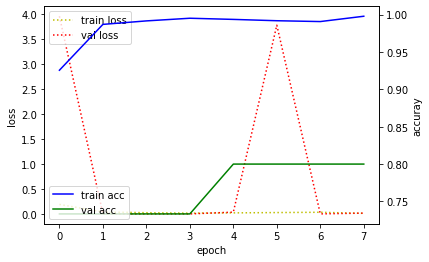

In [24]:
### 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y:', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r:', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## **Lab 1**

4장의 <u>"도전 시험셋"에 대한 val_accuracy를 향상</u>시킬 수 있도록 수정합니다.

*   CNN 모델의 레이어 또는 파라미터를 자유롭게 조절
*   또는, 데이터 증강하는 ImageGenerator방법을 자유롭게 조절

실습코드의 결과를 초과하여 성능이 향상되는 구성을 만들어보고, 출력 결과를 확인합니다.

**※ 제출방법:** 실습내용 및 출력 결과가 저장된 Colab 파일(`*.ipynb`)를 KLMS의 과제 항목에 업로드

### 변경 내용
1. Layer
- Convolutional Layer(filters=64, kernel_size=(3, 3))와 MaxPooling Layer(pool_size=(2, 2)) 각각 하나씩 추가

2. Image Data Generator
- rotation_range : 10 -> 20
- width_shift_range : 0.2 -> 0.4
- height_shift_range : 0.2 -> 0.4
- shear_range : 0.7 -> 2.0

### 결론
테스트 데이터가 15개 밖에 없다보니 정확한 val_accuracy 값을 구하기 어려웠다.

In [10]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [46]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=2.0,
                                   zoom_range=[0.9, 2.9],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [47]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [48]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# 4. 모델 학습시키기
### EarlyStop 추가 (val_loss가 2번 연속으로 개선되지 않으면 종료)
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5, 
        callbacks=[early_stop])

Epoch 1/200
1500/1500 [==============================] - 27s 18ms/step - loss: 0.6978 - accuracy: 0.6429 - val_loss: 0.1163 - val_accuracy: 0.8667
Epoch 2/200
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2088 - accuracy: 0.9278 - val_loss: 0.3621 - val_accuracy: 0.8667
Epoch 3/200
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1372 - accuracy: 0.9509 - val_loss: 0.4411 - val_accuracy: 0.9333
Epoch 4/200
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0990 - accuracy: 0.9600 - val_loss: 0.1286 - val_accuracy: 0.8667
Epoch 5/200
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0826 - accuracy: 0.9711 - val_loss: 6.6863e-04 - val_accuracy: 0.8000
Epoch 6/200
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 1.1014 - val_accuracy: 0.8667
Epoch 7/200
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0647 - accuracy: 0.9769 - val_los

In [50]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 100.00%


In [51]:
# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.001 0.998 0.001]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.004 0.996]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.004 0.996]
 [1.000 0.000 0.000]
 [0.002 0.579 0.419]
 [0.987 0.013 0.000]
 [0.977 0.014 0.009]
 [0.000 0.000 1.000]]
